Using device: cuda
Processing YouTube real videos...


100%|██████████| 300/300 [01:10<00:00,  4.28it/s]


Processing Celeb real videos...


100%|██████████| 590/590 [02:02<00:00,  4.80it/s]


Processing synthesized videos...


100%|██████████| 5639/5639 [19:15<00:00,  4.88it/s]


Total frames extracted: 130561
Train set: 91392 samples
Validation set: 19584 samples
Test set: 19585 samples


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 82.5MB/s] 



Epoch 1/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.30it/s]


Train Loss: 0.1881, Accuracy: 0.9303, AUC: 0.9352, Precision: 0.9387, EER: 0.1522
Valid Loss: 0.1161, Accuracy: 0.9558, AUC: 0.9787, Precision: 0.9651, EER: 0.0814
Saved best model!

Epoch 2/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.29it/s]


Train Loss: 0.0931, Accuracy: 0.9647, AUC: 0.9861, Precision: 0.9728, EER: 0.0634
Valid Loss: 0.0977, Accuracy: 0.9624, AUC: 0.9869, Precision: 0.9644, EER: 0.0656
Saved best model!

Epoch 3/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.28it/s]


Train Loss: 0.0639, Accuracy: 0.9761, AUC: 0.9937, Precision: 0.9826, EER: 0.0413
Valid Loss: 0.0786, Accuracy: 0.9695, AUC: 0.9906, Precision: 0.9776, EER: 0.0506
Saved best model!

Epoch 4/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.28it/s]


Train Loss: 0.0481, Accuracy: 0.9820, AUC: 0.9966, Precision: 0.9875, EER: 0.0298
Valid Loss: 0.0791, Accuracy: 0.9689, AUC: 0.9914, Precision: 0.9748, EER: 0.0487
Saved best model!

Epoch 5/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.28it/s]


Train Loss: 0.0408, Accuracy: 0.9849, AUC: 0.9975, Precision: 0.9896, EER: 0.0245
Valid Loss: 0.0723, Accuracy: 0.9723, AUC: 0.9925, Precision: 0.9815, EER: 0.0465
Saved best model!

Epoch 6/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.29it/s]


Train Loss: 0.0344, Accuracy: 0.9876, AUC: 0.9981, Precision: 0.9916, EER: 0.0195
Valid Loss: 0.0715, Accuracy: 0.9732, AUC: 0.9931, Precision: 0.9790, EER: 0.0442
Saved best model!

Epoch 7/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.31it/s]


Train Loss: 0.0301, Accuracy: 0.9892, AUC: 0.9986, Precision: 0.9929, EER: 0.0170
Valid Loss: 0.0704, Accuracy: 0.9741, AUC: 0.9938, Precision: 0.9783, EER: 0.0412
Saved best model!

Epoch 8/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.30it/s]


Train Loss: 0.0274, Accuracy: 0.9899, AUC: 0.9989, Precision: 0.9931, EER: 0.0161
Valid Loss: 0.0686, Accuracy: 0.9751, AUC: 0.9940, Precision: 0.9841, EER: 0.0379
Saved best model!

Epoch 9/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.31it/s]


Train Loss: 0.0242, Accuracy: 0.9914, AUC: 0.9991, Precision: 0.9945, EER: 0.0133
Valid Loss: 0.1398, Accuracy: 0.9631, AUC: 0.9920, Precision: 0.9609, EER: 0.0472

Epoch 10/10


Validation: 100%|██████████| 612/612 [01:55<00:00,  5.31it/s]


Train Loss: 0.0236, Accuracy: 0.9918, AUC: 0.9991, Precision: 0.9948, EER: 0.0126
Valid Loss: 0.0725, Accuracy: 0.9755, AUC: 0.9937, Precision: 0.9808, EER: 0.0405

Evaluating on test set...


Validation: 100%|██████████| 613/613 [01:55<00:00,  5.31it/s]


Test Loss: 0.0687, Accuracy: 0.9759, AUC: 0.9943, Precision: 0.9843, EER: 0.0379

Training complete! Results saved to disk.


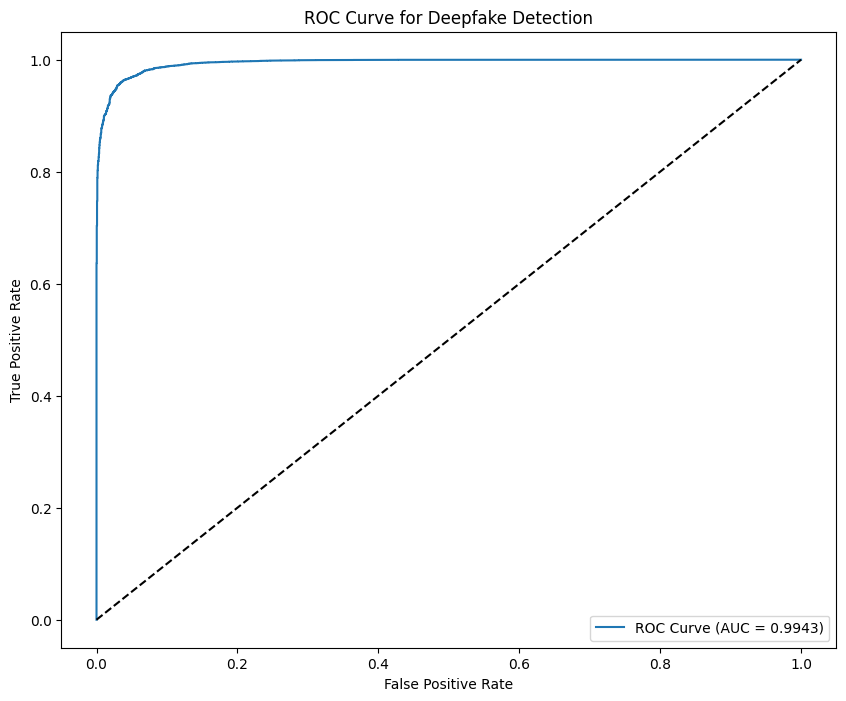

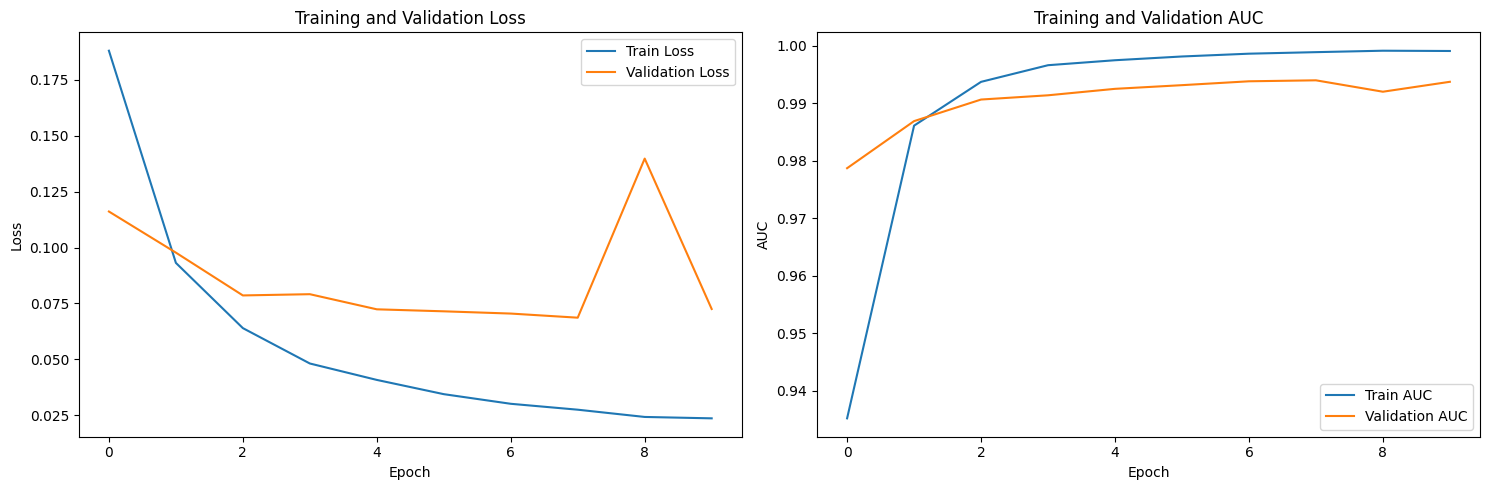

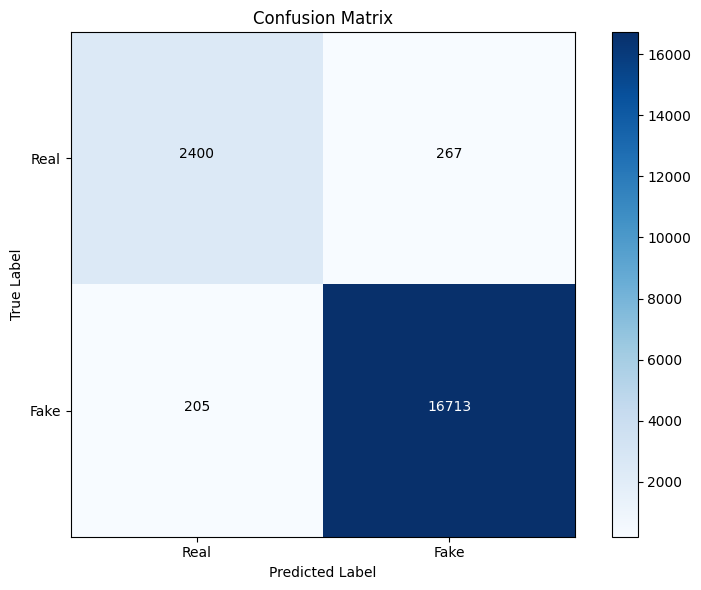

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import vit_b_16, ViT_B_16_Weights
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, confusion_matrix
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True

set_seed()

# Configuration
class Config:
    # Dataset paths - adjust these to your local setup
    DATASET_ROOT = "/kaggle/input/fake-celeb"  # Change this to your dataset path
    YOUTUBE_REAL_PATH = os.path.join(DATASET_ROOT, "YouTube-real")
    CELEB_REAL_PATH = os.path.join(DATASET_ROOT, "Celeb-real") 
    CELEB_FAKE_PATH = os.path.join(DATASET_ROOT, "Celeb-synthesis")
    
    # Frame extraction settings
    FRAME_SAVE_DIR = "extracted_frames"
    FRAMES_PER_VIDEO = 20  # Number of frames to extract from each video
    
    # Model settings
    IMG_SIZE = 224  # ViT standard input size
    BATCH_SIZE = 32
    NUM_EPOCHS = 10
    LEARNING_RATE = 2e-5
    WEIGHT_DECAY = 1e-4
    
    # Hardware settings
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    NUM_WORKERS = 4

config = Config()

# Create directory for extracted frames if it doesn't exist
os.makedirs(config.FRAME_SAVE_DIR, exist_ok=True)
os.makedirs(os.path.join(config.FRAME_SAVE_DIR, "real"), exist_ok=True)
os.makedirs(os.path.join(config.FRAME_SAVE_DIR, "fake"), exist_ok=True)

# Function to extract frames from videos
def extract_frames_from_videos(video_path, output_folder, label, num_frames=20):
    """
    Extract frames from a video file
    
    Args:
        video_path: Path to the video file
        output_folder: Folder to save extracted frames
        label: 'real' or 'fake'
        num_frames: Number of frames to extract
    
    Returns:
        List of paths to saved frames
    """
    video_name = os.path.basename(video_path).split('.')[0]
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count == 0:
        print(f"Warning: Could not read frames from {video_path}")
        return []
    
    # Calculate frame indices to extract (evenly distributed)
    if frame_count <= num_frames:
        frame_indices = list(range(frame_count))
    else:
        frame_indices = np.linspace(0, frame_count-1, num_frames, dtype=int)
    
    saved_frames = []
    for idx in frame_indices:
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        
        if ret:
            # Save the frame
            save_path = os.path.join(output_folder, label, f"{video_name}_frame_{idx}.jpg")
            cv2.imwrite(save_path, frame)
            saved_frames.append(save_path)
    
    cap.release()
    return saved_frames

def process_dataset():
    """Process all videos in the dataset and extract frames"""
    frame_paths = []
    labels = []
    
    # Process real videos from YouTube
    print("Processing YouTube real videos...")
    for video_file in tqdm(os.listdir(config.YOUTUBE_REAL_PATH)):
        if video_file.endswith(('.mp4', '.avi')):
            video_path = os.path.join(config.YOUTUBE_REAL_PATH, video_file)
            paths = extract_frames_from_videos(video_path, config.FRAME_SAVE_DIR, "real", config.FRAMES_PER_VIDEO)
            frame_paths.extend(paths)
            labels.extend([0] * len(paths))  # 0 for real
    
    # Process real videos from Celeb
    print("Processing Celeb real videos...")
    for video_file in tqdm(os.listdir(config.CELEB_REAL_PATH)):
        if video_file.endswith(('.mp4', '.avi')):
            video_path = os.path.join(config.CELEB_REAL_PATH, video_file)
            paths = extract_frames_from_videos(video_path, config.FRAME_SAVE_DIR, "real", config.FRAMES_PER_VIDEO)
            frame_paths.extend(paths)
            labels.extend([0] * len(paths))  # 0 for real
    
    # Process fake/synthesized videos
    print("Processing synthesized videos...")
    for video_file in tqdm(os.listdir(config.CELEB_FAKE_PATH)):
        if video_file.endswith(('.mp4', '.avi')):
            video_path = os.path.join(config.CELEB_FAKE_PATH, video_file)
            paths = extract_frames_from_videos(video_path, config.FRAME_SAVE_DIR, "fake", config.FRAMES_PER_VIDEO)
            frame_paths.extend(paths)
            labels.extend([1] * len(paths))  # 1 for fake
    
    # Create a dataframe for easier handling
    df = pd.DataFrame({
        'frame_path': frame_paths,
        'label': labels
    })
    
    # Save the dataframe
    df.to_csv('celeb_df_frames.csv', index=False)
    print(f"Total frames extracted: {len(df)}")
    
    return df

# Custom Dataset class
class DeepfakeDataset(Dataset):
    def __init__(self, frame_paths, labels, transform=None):
        self.frame_paths = frame_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.frame_paths)
    
    def __getitem__(self, idx):
        image_path = self.frame_paths[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        return image, label

# Vision Transformer model for deepfake detection
class DeepfakeViT(nn.Module):
    def __init__(self, pretrained=True, freeze_backbone=False):
        super(DeepfakeViT, self).__init__()
        
        # Load pretrained ViT model
        if pretrained:
            self.vit = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)
        else:
            self.vit = vit_b_16()
        
        # Replace the classifier head
        num_features = self.vit.heads.head.in_features
        self.vit.heads.head = nn.Linear(num_features, 1)
        
        # Freeze backbone if specified
        if freeze_backbone:
            for param in self.vit.parameters():
                param.requires_grad = False
            # Only make the classifier trainable
            for param in self.vit.heads.parameters():
                param.requires_grad = True
    
    def forward(self, x):
        x = self.vit(x)
        return x

# Calculate Equal Error Rate (EER)
def calculate_eer(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    
    # Find the threshold where FPR == FNR
    eer_threshold = thresholds[np.nanargmin(np.absolute(fnr - fpr))]
    eer = fpr[np.nanargmin(np.absolute(fnr - fpr))]
    
    return eer

# Training function
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    predictions = []
    true_labels = []
    
    for images, labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        labels = labels.float().to(device).unsqueeze(1)  # Convert to float for BCE loss
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Store predictions and true labels for metrics
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    avg_loss = running_loss / len(train_loader)
    
    # Convert to numpy arrays for metric calculation
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)
    
    return avg_loss, predictions, true_labels

# Validation function
def validate(model, valid_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc="Validation"):
            images = images.to(device)
            labels = labels.float().to(device).unsqueeze(1)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            
            # Store predictions and true labels for metrics
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    
    avg_loss = running_loss / len(valid_loader)
    
    # Convert to numpy arrays for metric calculation
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)
    
    return avg_loss, predictions, true_labels

# Calculate metrics
def calculate_metrics(true_labels, predictions, threshold=0.5):
    binary_preds = (predictions >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(true_labels, binary_preds)
    precision = precision_score(true_labels, binary_preds)
    auc = roc_auc_score(true_labels, predictions)
    eer = calculate_eer(true_labels, predictions)
    
    metrics = {
        'accuracy': acc,
        'precision': precision,
        'auc': auc,
        'eer': eer
    }
    
    return metrics

# Main training pipeline
def main():
    print(f"Using device: {config.DEVICE}")
    
    # Process dataset (extract frames from videos)
    if not os.path.exists('celeb_df_frames.csv'):
        df = process_dataset()
    else:
        df = pd.read_csv('celeb_df_frames.csv')
        print(f"Loaded {len(df)} frames from CSV.")
    
    # Split data into train, validation, and test sets
    train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
    valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)
    
    print(f"Train set: {len(train_df)} samples")
    print(f"Validation set: {len(valid_df)} samples")
    print(f"Test set: {len(test_df)} samples")
    
    # Define transformations
    train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    valid_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Create datasets
    train_dataset = DeepfakeDataset(
        train_df['frame_path'].values,
        train_df['label'].values,
        transform=train_transform
    )
    
    valid_dataset = DeepfakeDataset(
        valid_df['frame_path'].values,
        valid_df['label'].values,
        transform=valid_transform
    )
    
    test_dataset = DeepfakeDataset(
        test_df['frame_path'].values,
        test_df['label'].values,
        transform=valid_transform
    )
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True,
        num_workers=config.NUM_WORKERS,
        pin_memory=True
    )
    
    valid_loader = DataLoader(
        valid_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False,
        num_workers=config.NUM_WORKERS,
        pin_memory=True
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=False,
        num_workers=config.NUM_WORKERS,
        pin_memory=True
    )
    
    # Initialize model
    model = DeepfakeViT(pretrained=True, freeze_backbone=False)
    model = model.to(config.DEVICE)
    
    # Loss function and optimizer
    criterion = nn.BCEWithLogitsLoss()
    
    # Use different learning rates for different layers
    # Higher learning rate for the classifier head, lower for the backbone
    optimizer = optim.AdamW([
        {'params': model.vit.heads.parameters(), 'lr': config.LEARNING_RATE * 10},
        {'params': model.vit.encoder.parameters()}
    ], lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min',
        factor=0.5,
        patience=2,
        verbose=True
    )
    
    # Training loop
    best_val_auc = 0.0
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_metrics': [],
        'val_metrics': []
    }
    
    for epoch in range(config.NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{config.NUM_EPOCHS}")
        
        # Train
        train_loss, train_preds, train_labels = train(model, train_loader, optimizer, criterion, config.DEVICE)
        train_metrics = calculate_metrics(train_labels, train_preds)
        
        # Validate
        val_loss, val_preds, val_labels = validate(model, valid_loader, criterion, config.DEVICE)
        val_metrics = calculate_metrics(val_labels, val_preds)
        
        # Update scheduler
        scheduler.step(val_loss)
        
        # Save metrics
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_metrics'].append(train_metrics)
        history['val_metrics'].append(val_metrics)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, " +
              f"Accuracy: {train_metrics['accuracy']:.4f}, " +
              f"AUC: {train_metrics['auc']:.4f}, " +
              f"Precision: {train_metrics['precision']:.4f}, " +
              f"EER: {train_metrics['eer']:.4f}")
        
        print(f"Valid Loss: {val_loss:.4f}, " +
              f"Accuracy: {val_metrics['accuracy']:.4f}, " +
              f"AUC: {val_metrics['auc']:.4f}, " +
              f"Precision: {val_metrics['precision']:.4f}, " +
              f"EER: {val_metrics['eer']:.4f}")
        
        # Save best model
        if val_metrics['auc'] > best_val_auc:
            best_val_auc = val_metrics['auc']
            torch.save(model.state_dict(), 'best_deepfake_vit_model.pth')
            print("Saved best model!")
    
    # Load best model for testing
    model.load_state_dict(torch.load('best_deepfake_vit_model.pth'))
    
    # Test the model
    print("\nEvaluating on test set...")
    test_loss, test_preds, test_labels = validate(model, test_loader, criterion, config.DEVICE)
    test_metrics = calculate_metrics(test_labels, test_preds)
    
    print(f"Test Loss: {test_loss:.4f}, " +
          f"Accuracy: {test_metrics['accuracy']:.4f}, " +
          f"AUC: {test_metrics['auc']:.4f}, " +
          f"Precision: {test_metrics['precision']:.4f}, " +
          f"EER: {test_metrics['eer']:.4f}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(test_labels, test_preds)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_metrics["auc"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Deepfake Detection')
    plt.legend()
    plt.savefig('roc_curve.png')
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    train_auc = [m['auc'] for m in history['train_metrics']]
    val_auc = [m['auc'] for m in history['val_metrics']]
    plt.plot(train_auc, label='Train AUC')
    plt.plot(val_auc, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Training and Validation AUC')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    
    # Create a confusion matrix
    binary_test_preds = (test_preds >= 0.5).astype(int)
    cm = confusion_matrix(test_labels, binary_test_preds)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    classes = ['Real', 'Fake']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations to the confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    
    print("\nTraining complete! Results saved to disk.")

if __name__ == "__main__":
    main()